# Homework #7

**See Canvas for the HW #7 assignment and due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the class scanning policy. Please do not turn in messy work. Computational problems should be completed in this notebook (using the `R` kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 



## A. Theoretical Problems

None this time around!

## B. Computational Problems

## Problem B.1: Bootstrap confidence interval for standard deviation

Suppose that $X_1,...,X_8 \overset{iid}{\sim} \Gamma(\alpha, \beta)$ (see [here](https://en.wikipedia.org/wiki/Gamma_distribution) for more information on the gamma distribution). Let's use the bootstrap to compute a $90\%$ confidence interval for the population standard deviation: $sd(X) = \sqrt{\alpha/\beta^2} = \theta$.


*Note: The convention in this course will be to interpret $\Gamma(\alpha, \beta)$ as the "shape/rate" parameterization: shape = $\alpha$, rate = $\beta$. But `R` uses the "shape/scale" parameterization: shape = $\alpha$, scale = $\theta = 1/\beta$.*

To be sure that you are properly simulating from the right gamma distribution, see the help file for `rgamma()` (meaning, run the line: ?rgamma).


**B.1(a) [10 points] There is a "theory-derived" confidence interval for the standard deviation, which depends on the $\chi^2$ distribution. Research this confidence interval (or find the correct section of the Unit 5 Notes). State why a $\chi^2$ confidence interval is not valid in this context.**

The Chisquare CI is not applicable in this problem because it's applicable only when we have a data which is sampled from a normal distribution. Here the data is sampled from a Gamma distribution and it's not symmetric. Usually Chi Square distribution mostly follows the normal distribution's assumptions so we cannot use it here. Instead we can use the bootstrap sampling here since it won't have any mandatory requirement of using any distribution and it can also be done with a non parametric distribution so we are free to use this Bootstrap samnling technique.

**B.1(b) [6 points] Simulate a sample of size $n = 8$ from $\Gamma(\alpha = 3, \beta = 4)$ and calculate the true population standard deviation (in this example, we are generating data so that we can see how well our estimation procedure will do).**

In [18]:
n = 8
alpha = 3
beta = 4
x = rgamma(n, shape = alpha, scale = 1/beta)
x
pop_sd = sqrt(alpha/beta^2)
pop_sd

[1] 0.2885558 0.6081004 0.3746464 0.8334435 1.2582407 0.3384140 0.6605405
[8] 0.4044569

[1] 0.4330127

**B.1(c) [6 points] Generate $B = 200$ bootstrap samples from the above sample. Print the dimension, and articulate what each row/column represents. To avoid loops, use the `replicate()` function.**

In [19]:
y = length(x)
B = 200
y
z = t(replicate(B, sample(x,y,replace = TRUE)))
head(z)
dim(z)
z

[1] 8

0.2885558,0.6081004,0.8334435,0.6081004,0.6081004,0.3746464,0.2885558,0.3384140
0.2885558,1.2582407,0.6081004,0.6605405,0.2885558,0.2885558,0.8334435,0.3384140
0.3384140,1.2582407,0.3746464,0.3384140,0.3384140,0.4044569,0.3384140,0.2885558
0.3384140,0.6605405,0.3746464,0.6605405,0.2885558,0.6605405,0.3384140,0.3746464
0.3746464,0.8334435,0.3384140,0.3384140,0.6081004,0.8334435,0.2885558,0.3384140
0.6605405,0.3746464,0.6081004,0.3746464,0.4044569,0.6081004,0.3384140,0.6081004


[1] 200   8

0.2885558,0.6081004,0.8334435,0.6081004,0.6081004,0.3746464,0.2885558,0.3384140
0.2885558,1.2582407,0.6081004,0.6605405,0.2885558,0.2885558,0.8334435,0.3384140
0.3384140,1.2582407,0.3746464,0.3384140,0.3384140,0.4044569,0.3384140,0.2885558
0.3384140,0.6605405,0.3746464,0.6605405,0.2885558,0.6605405,0.3384140,0.3746464
0.3746464,0.8334435,0.3384140,0.3384140,0.6081004,0.8334435,0.2885558,0.3384140
0.6605405,0.3746464,0.6081004,0.3746464,0.4044569,0.6081004,0.3384140,0.6081004
0.3384140,1.2582407,0.8334435,0.6081004,0.3746464,1.2582407,1.2582407,0.6605405
0.3746464,0.6605405,0.3746464,0.3746464,0.2885558,0.4044569,0.6605405,0.8334435
0.3746464,0.3746464,0.8334435,0.8334435,0.6081004,0.2885558,0.6081004,0.4044569
0.4044569,1.2582407,0.3384140,0.4044569,0.3384140,0.8334435,0.2885558,0.8334435
0.8334435,0.8334435,1.2582407,0.3384140,0.8334435,0.2885558,0.4044569,0.6081004


- rows - the bootstrap samples generated
- columns - The values resampled from the gamma distribution 

**B.1(d) [4 points] Calculate and print the sample standard deviation, $s$. Then, calculate $s$ for each bootstrap sample. Denote this as $s^*_i$, for $i = 1,...,B$. To avoid loops, use the `apply()` function. Display a histogram of the distribution of  $s^*_i, \,\, i=1,...B$.**

[1] 0.3264117

[1] 0.1989772 0.3472317 0.3242759 0.1665388 0.2306934 0.1349232

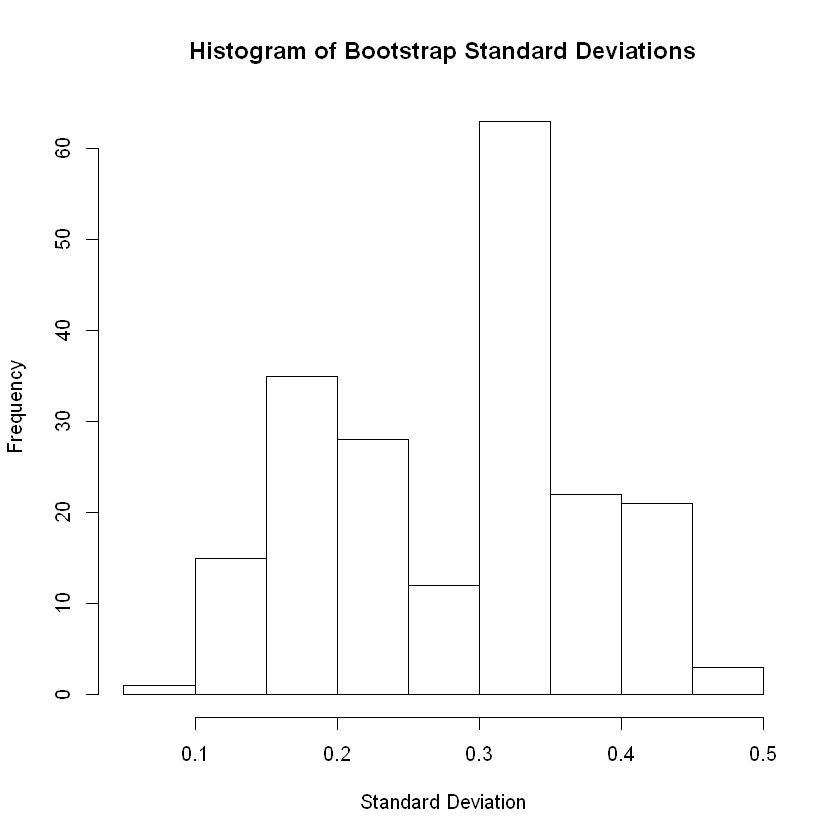

In [21]:
s = sd(x)
s

s_st_i = apply(z,1,sd)

hist(s_st_i, main = "Histogram of Bootstrap Standard Deviations",
     xlab = "Standard Deviation", ylab = "Frequency")

head(s_st_i)

**B.1(e) [8 points] Use the `quantile()` function to find the $5$th and $95$th percentile of the distribution of  $s^*_i$. Use these values to calculate the $90\%$ boostrap pivot confidence interval and bootstrap percentile confidence interval for $\theta$.**

In [22]:
# Bootstrap Percentile CI
percentile_CI = quantile(s_st_i, c(0.05, 0.95))
percentile_CI

# Bootstrap Pivot CI
lower_pivot = 2*s - as.numeric(percentile_CI[2])
upper_pivot = 2*s - as.numeric(percentile_CI[1])
lower_pivot
upper_pivot


5%       95% 
0.1381223 0.4195606

[1] 0.2332629

[1] 0.5147012

**B.1(f) [4 points] Interpret this confidence interval.**

We are 90% confident that the true standard deviation lies within this Percentile Confidence interval. ie. If we are repeatedly taking the samples from the population and when we calculate a 90% bootstrap Percentile CI for each sample, we can get the true standard deviation in approximately 90% of those intervals. 

This Pivot CI adjusts the Percentile CI so that it solves the difference in bootstrap distribution and the original distribution. And it will make the interval more accurate and reduce the bias in the interval.

## Problem B.2: The parametric bootstrap

Suppose that $X_1,...,X_n \overset{iid}{\sim}N(\mu, \sigma^2)$, where $\sigma$ is known, and we are ultimately interested in an estimator for $\theta = \mu^2$.


Thus far, we have been looking at the *nonparametric bootstrap*. In this problem, we look at the *parametric bootstrap* as a way of estimating the bias and variance of an estimator $\widehat{\theta} = \bar{X}^2$ of $\theta = \mu^2$.

**B.2(a) [4 points] Generate $X_1,...,X_{20} \overset{iid}{\sim}N(\mu = 2, \sigma^2 = 1)$, and then forget that you know $\mu$ and $\sigma^2$. Find the sample mean and sample variance.**

In [41]:
n = 20
mu = 2
sigma_sq = 1
x = rnorm(n,mu,sqrt(sigma_sq))
xbar = mean(x)
xbar
s_sq = var(x)
s_sq

[1] 2.149899

[1] 0.9156278

**B.2(b) [4 points] Define $\widehat{N}$ to be the distribution of the variable $X_i$ in the population with the sample estimates plugged in for the unknown population parameters. Write down $\widehat{N}$ based on the data generated in (a).**

We define $\hat{N}$ as: $\hat{N} \sim \mathcal{N}\left(\bar{X}, S^2\right)$
ie. 
$\hat{N}$ ~ $N(2.14989914553347,0.915627824374623)$
where:
- $\bar{X}$ is the **sample mean** calculated from the data.
- $S^2$ is the **sample variance** calculated from the data.

**B.2(c) [4 points] Draw $B = 500$ parametric bootstrap samples from $\widehat{N}$, and for each bootstrap sample $(X_{i,1},...,X_{i,20})$, compute $$ \widehat{\theta}^*_i = \left(\frac{1}{20}\sum^{20}_{j=1}X^*_{i,j}\right)^2,$$ where $i = 1,...,B$ (I assume that each sample is the row of a matrix $X^*_{i, j}$; swap the indices if you used columns).**

In [42]:
B = 500
n = 20

z = t(replicate(B, rnorm(n,xbar,sqrt(s_sq))))
theta_st_i = apply(z, 1, function(x) (mean(x))^2)
head(theta_st_i)

[1] 4.856210 5.027444 5.735830 2.916189 4.571334 3.848791

**B.2(d) [8 points] Compute an estimate of the bias:**

\begin{align*}
\widehat{\text{Bias}}(\widehat{\theta}) \approx \left( \frac{1}{B}\sum^B_{i=1}\widehat{\theta}^*_i \right) - \bar{X}^2.
\end{align*}

**Compare this to the exact bias using the formula $\displaystyle \text{Bias}(\widehat{\theta}) = \text{Bias}(\bar{X}^2) = E[\bar{X}^2] - \mu^2 = \frac{\sigma^2}{n}$.**

In [43]:
# Estimate of Bias
mean_z = mean(theta_st_i)
mean_z

bias_est = mean_z - (xbar)^2
bias_est

# Formula Bias
form_bias = sigma_sq / n
form_bias


[1] 4.651434

[1] 0.0293673

[1] 0.05

The Parametric estimated bias value is close to the theoritical bias value. The small difference is due to the the random nature of the bootstrap sampling.

**B.2(e) [8 points] Compute an estimate of the variance:**

\begin{align*}
\widehat{\text{Var}}(\widehat{\theta}) \approx \frac{1}{B-1}\sum^B_{i=1}\big(\widehat{\theta}^*_i - \bar{\theta} \big)^2,
\end{align*}
where 
\begin{align*}
\bar{\theta} = \frac{1}{B}\sum^B_{i=1}\widehat{\theta}^*_i.
\end{align*}
**Compare this to the exact variance:**

\begin{align*}
\text{Var}(\bar{X}^2) &=  4\frac{\sigma^2\mu^2}{n} + 2\frac{\sigma^4}{n^2}
\end{align*}

In [44]:
# Parametric Bootstrap Estimate of Variance
var_est = sum((theta_st_i - mean_z)^2) / (B-1)
var_est

# Formula Variance
form_var = 4 * (sigma_sq * mu^2) / n + 2 * (sigma_sq^2) / (n^2)
form_var

[1] 0.9485147

[1] 0.805

The Parametric estimated Variance value is close to the theoritical Variance value. The small difference is due to the the Variability in the bootstrap sampling.

#### (f) [10 points] True or False: For a fixed sample size $n = 20$, as $B$ increases, $\widehat{Bias}(\widehat{\theta})$ will approach ${Bias}(\widehat{\theta})$.  That is, for a fixed $n$, the bootstrap estimate of the bias will approach the true bias as the number of bootstrap samples, $B$ increases. You might consider running a simulation to decide!

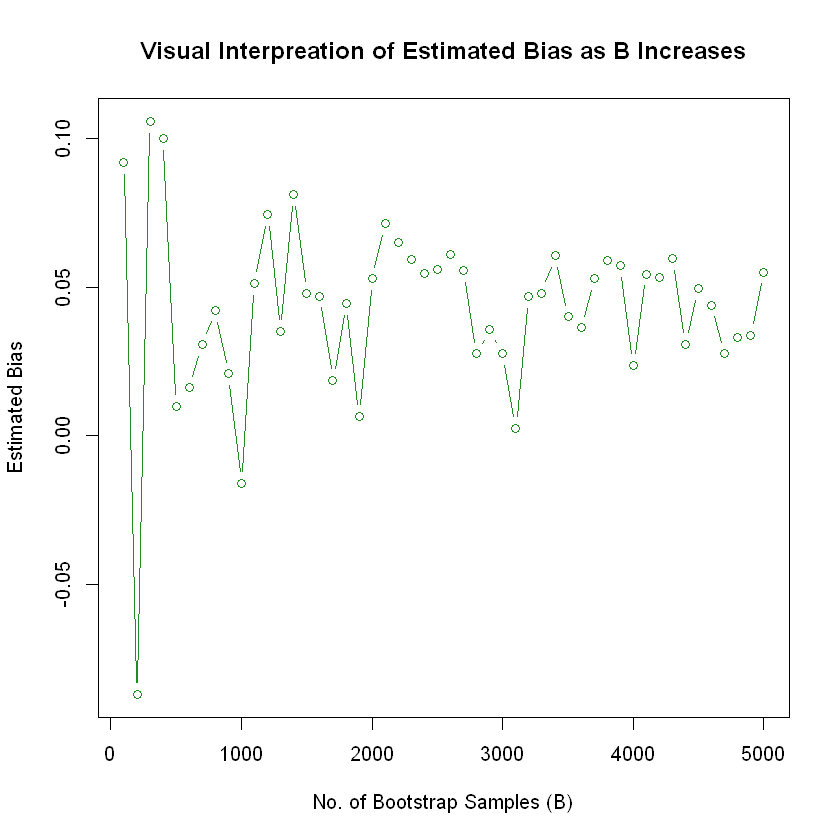

In [46]:

mu = 2
sigma_sq = 1
n = 20
 
X = rnorm(n, mu, sqrt(sigma_sq))

xbar = mean(X)
s_sq = var(X)

bias_test_fn <- function(B, n, xbar, s_sq) {
  z = replicate(B, rnorm(n, xbar, sqrt(s_sq)))
  
  theta_st_i = apply(z, 2, function(x) (mean(x))^2)
  
  mean_z = mean(theta_st_i)
  
  bias_est = mean_z - (xbar^2)
  
  return(bias_est)
}

n = 20

B_val = seq(100, 5000, by = 100)
estimated_biases = sapply(B_val, bias_test_fn, n, xbar, s_sq)

plot(B_val, estimated_biases, type = "b", col = "forestgreen",
     xlab = "No. of Bootstrap Samples (B)", ylab = "Estimated Bias",
     main = "Visual Interpreation of Estimated Bias as B Increases")



This simulation plot clearly tells that the above mentioned statement is TRUE. ie. If we increase the value of B the estimated bias will converge towards the true Bias. So with large no. of bootstrap samples the estimated bias will become more accurate as of the True bias.

## Problem B.3 Bootstrap assumptions 
The dataset `nyc_births.csv` gives the number of births per month in New York city, from January 1946 to December 1959. The data are ordered.


**B.3(a) [10 points] Load the dataset, and construct a plot of births per month against the month/year column. Analyze the plot. Do you notice anything interesting?** *Hint: you may need to use the line `births$date = as.Date(births$date, "%Y-%m-%d")` to convert the date column in your data frame to a more appropriate format (here `births` is the name of the dataframe loaded from the file `nyc_births`).*

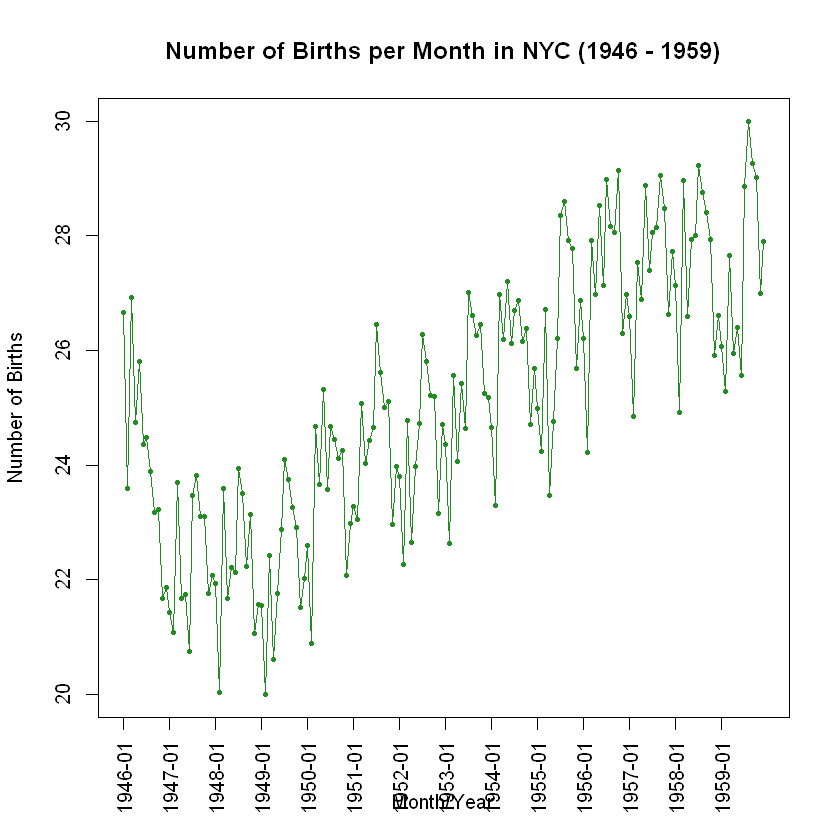

In [47]:
births  = read.csv("C:/Users/yoges/STAT 5000/nyc_births.csv")
births$date = as.Date(births$date, "%Y-%m-%d")
births$month_year = format(births$date, "%Y-%m")
x_seq = 1:length(births$month_year)

plot(x_seq, births$births, type = "o", col = "forestgreen",
     main = "Number of Births per Month in NYC (1946 - 1959)",
     xlab = "Month/Year", ylab = "Number of Births",
     pch = 16, lty = 1, cex = 0.6, xaxt = "n")

axis(1, at = seq(1, length(births$month_year), by = 12),
     labels = format(births$date[seq(1, length(births$date), by = 12)], "%Y-%m"), las = 2)


- There is an upward trend in the no. of births from 1948 to 1959.
- There are occasional drop in the no. of births from 1946 to 1948.
- It's having seasonal variation since it's a time series data.

**B.3(b) [10 points] Suppose that your boss asked you to use the bootstrap to construct a confidence interval for the average number of births per month in New York city over the time period in the dataset. Write a short response to your boss describing why this confidence interval is not valid for these data.**

In [25]:
B = 1000
n = length(births$births)

bootstrap_means = replicate(B, mean(sample(births$births, n, replace = TRUE)))

CI_lower <- quantile(bootstrap_means, 0.025)
CI_upper <- quantile(bootstrap_means, 0.975)

CI_lower
CI_upper

2.5% 
24.71403

97.5% 
25.40545

Bootstrap approach is useful for deriving the CIs when data is iid. But, in this dataset of 'newyorkcity_births' there is a variation in the no. of births based on the seasonality ie. no. of births in a month influenced by the no. of births in previous months and it shows a seasonal pattern.

So using Bootstrap approach here without considering this seasonal variation may lead to inaccurate CIs. If there is no seasonal variation then we might have used the Bootstrap approach for this problem to get an accuracte CIs.